In [1]:
import pandas as pd
import plotnine as p9
from plotnine import *
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter
from wordcloud import WordCloud
from IPython.display import Image
from IPython.core.display import HTML 

# What makes TikTok tick?
**Exploration of attributes that make a popular TikTok song**

*Sameerah Helal, Radhika Kulkarni, Kevin Xu, Darya Petrov*

The 5 categories that are being represented in the report are: 
* Project organization, writeup readability, and overall conclusions
* Code quality, readability, and efficiency
* Data munging
* Data visualization
* Data extraction

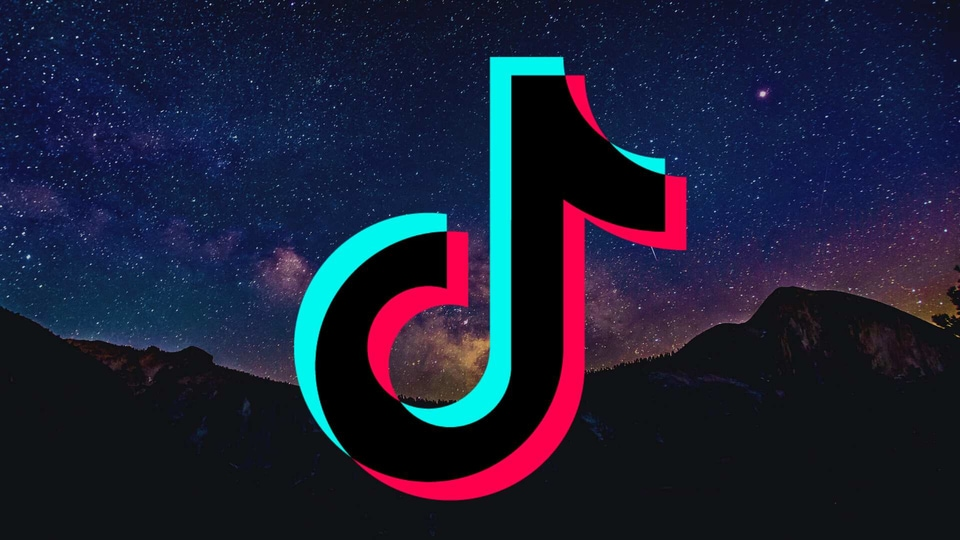

## Introduction

TikTok has been around for a couple years, and in that time has managed to capture a worldwide audience with its enticing songs and consumable 15-60s short-form content. 

We noticed that most popular social media platforms and video-sharing sites originate from the United States and we were intrigued by TikTok’s rapid growth from its Chinese origins. After exploring a diverse selection of TikTok videos, we suspected that the music was a key factor that led to TikTok’s widespread success. Hence, we our core objective with this exploration is to investigate what makes music on TikTok popular to current audiences. 

Our intention is to explore and extract relationships between features of two playlists, TikTok songs from the playlist posted by TikTok on Spotify, and the top songs from 2019-2021, an aggregated playlist extracted from Spotify. We plan to explore the density of popular TikTok and Top song features, explore correlation between TikTok and Top song features, visualize relationships between features of playlists, and compare TikTok songs to Top songs.

## Data

Our first playlist was the Tiktok hits playlist created by Tiktok. To compare these Tiktok songs to, we have top hits playlists for the past 3 years, since that's when the app picked up in popularity. The playlists for 2019 and 2020 are from Spotify itself, which we thought would be a reliable source for popular songs. And since Spotify doesn't have its 2021 playlist up yet, we used a user-compiled playlist for 2021.

Spotify Public Playlists: 

1. TikTok Hits by TikTok
2. Top Hits of 2019 by Spotify 
3. Top Tracks of 2020 by Spotify 
4. Top Hits of 2021 by NiCampos

Source: Spotify's API

* Created an app (141b) in our Spotify Developer Account: 
    - Client that requests access to protected resources
    - HTTPS requests in UTF-8 format to an API endpoint
    - Followed the 'Client Credentials' OAUTH flow from Spotify which gives us access to public data
    - The system authenticates and authorizes the app rather than a user
    - API gives a json format
* Parsed json file and extract features into a dataframe 

## Data Extraction

Before extracting data, we had decided that the bulk of our exploration would be focused on generating and interpreting visualizations. Hence, we decided to scrape raw JSON music data using a web API rather than parsing HTML tags for useful data. Out of the several music web APIs that we had considered (Shazam API, iTunes API, and Spotify API), we selected Spotify's web API. This was for several reasons: 1) There exists a lightwieght python library (Spotipy) that streamlined the authorization process and 2) the Spotify web API has available endpoints that would potentially be helpful for analysis (Danceability, Valence...etc.). 

The flow of data extraction began by creating a Spotify Developer account and an app that provided us with a 'Client ID' and 'Client Secret ID' that allowed us to request an access token from Spotify Accounts Services. 
After acquiring an access token, all we needed for the extraction of specific playlists using the Spotify web API was the ID (URI) of the artists and playlists of interest: these were readily available in the artist and playlist profiles on Spotify. From here, we made our Spotify API call with the desired endpoints and a JSON format of the data was returned.

Converting JSON to dataframes...

##### Spotify Developer Account Dashboard

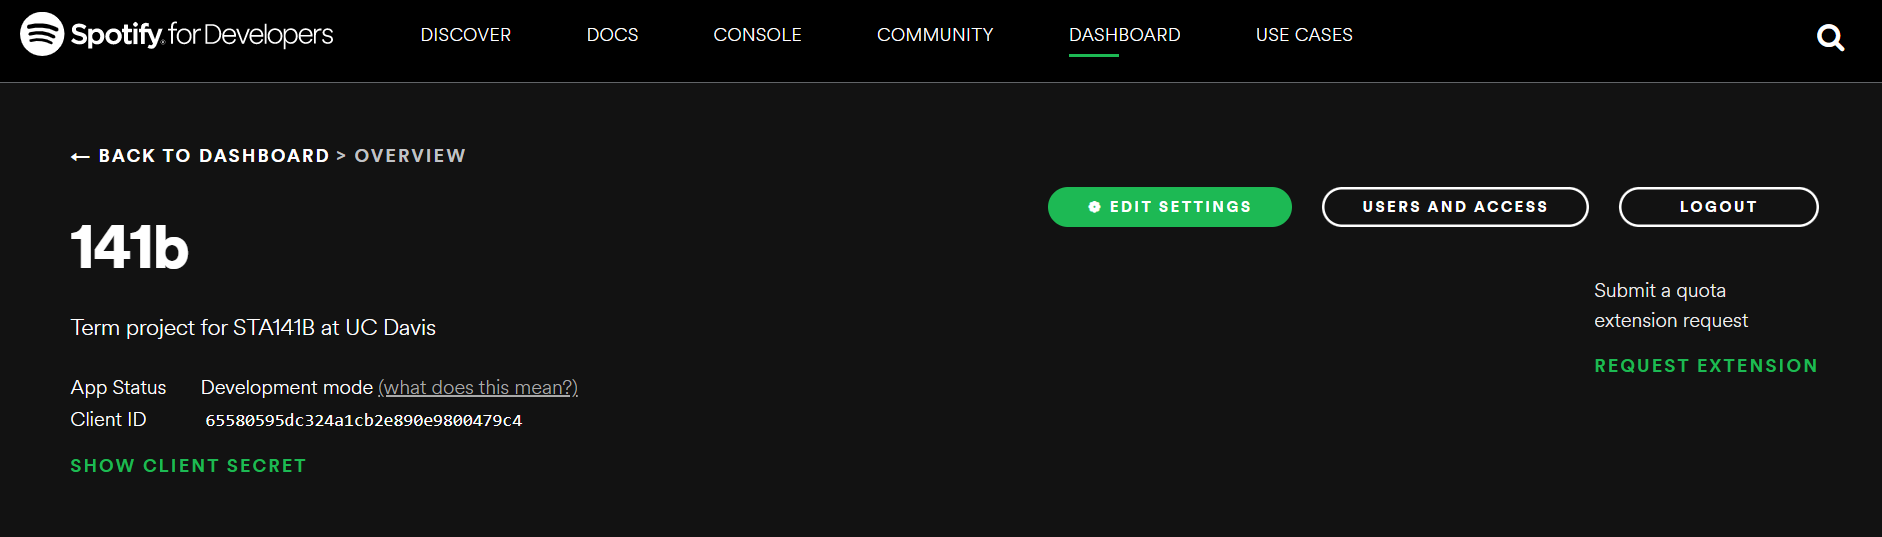

##### Flow of Authorization
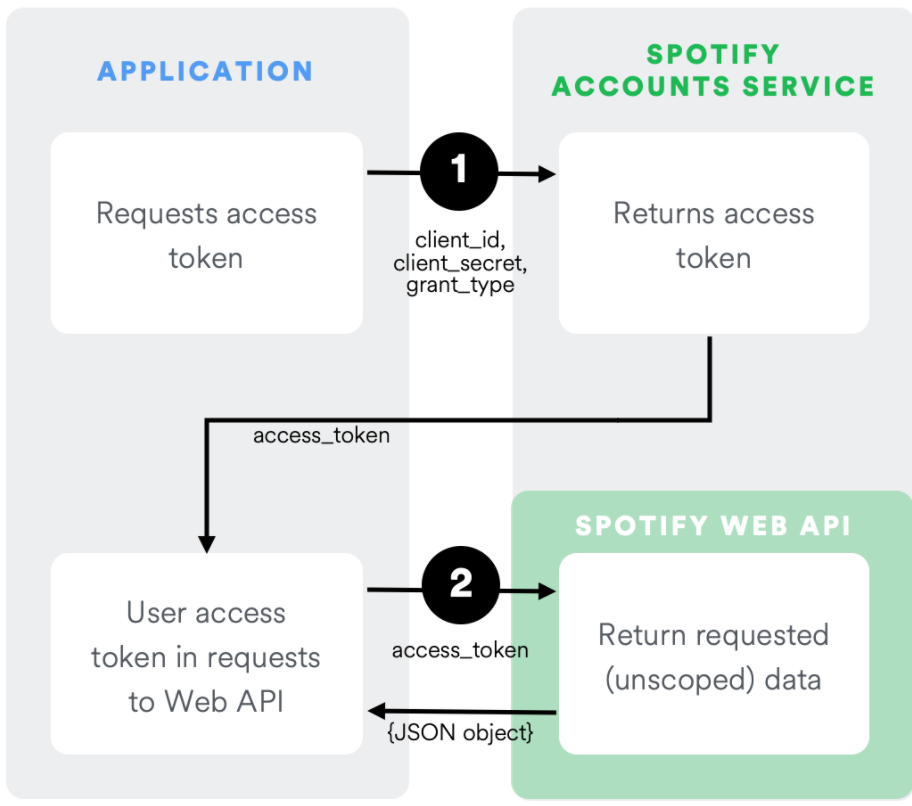

# JSON 

We made our requests using the `spotipy` package, which only allowed us to scrape 100 songs at a time. This remained an issue preventing us from accessing the whole playlist until we figured out that the JSONs returned by the command contained a key called "next", linking to the next page of the playlist. Using this, we were able to access the entire playlist by making additional requests using `spotipy`'s next command.

Below is the json we get when Spotify responds to our request for the data of a given playlist. It is very long and several times nested, meaning that many of the keys have dictionaries as their values. 

To extract the song information for a playlist, we wrote a function to make the multiple requests, parse the JSON, and save the resulting dataframe to a CSV.

In this JSON, the songs are stored in a list under a key called items. We indexed into items, looped through the list of songs, adding their information to a dataframe. Once the loop ended, our dataframe contained every song and every

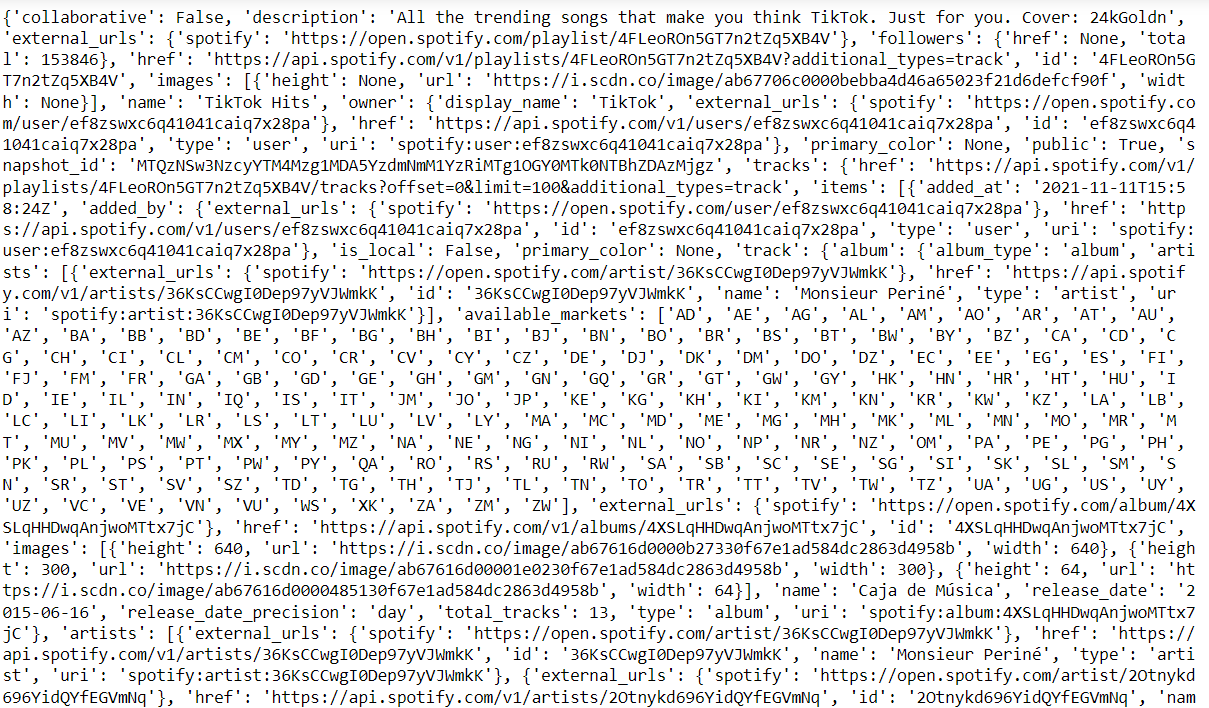

## Scraping Data

Please note that the code below will scrape the most current/updated data. The data we scraped is from 11/21/2021 and is saved in the data directory; the analysis below is unique to that data.

In [65]:
%run ../code/scraper.py

In [75]:
playlist_to_df("ef8zswxc6q41041caiq7x28pa", "4FLeoROn5GT7n2tZq5XB4V", "TikTok_Playlist", tracks_exist = False)

In [72]:
playlist_to_df("spotify", "37i9dQZF1DWVRSukIED0e9", "Popular_Playlist_2019", tracks_exist = False)

In [71]:
playlist_to_df("spotify", "37i9dQZF1DX7Jl5KP2eZaS", "Popular_Playlist_2020", tracks_exist = False)

In [70]:
playlist_to_df("nick170708%21", "5GhQiRkGuqzpWZSE7OU4Se", "Popular_Playlist_2021", tracks_exist = False)

## Variable Descriptions

**id**: (string) The Spotify ID for the track.

**title**: (string) The name of the song for the track. 

**all_artists**: (string) The name of the artists for the song.

**popularity**: (int) Popularity is measured on a scale from 0-100 of how popular the song is. "[P]opularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are. Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past"

**release_date**: (string) The date on which the track was released for listening on Spotify, represented in yyyy-mm-dd format.

**danceability**: (float) Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

**energy**: (float) Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

**key**: (int) The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1. >= -1, <= 11

**loudness**: (float) The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.

**mode**: (int) Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

**acousticness**: (float) A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic. >= 0 <= 1

**instrumentalness**: (float) Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

**liveness**: (float) Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

**valence**: (float) A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry). >= 0 <= 1

**tempo**: (float) The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

**duration_ms**: (int) The duration of the track in milliseconds.

**time_signature**: (int) An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of "3/4", to "7/4". >= 3 <= 7

## Load in Data

Since the scraped and cleaned data was saved in .csv files, the data is loaded by reading the relevant csv file. For visualizing purposes, we perform data munging. We reformat the release date, and scale the popularity variable from [0,100] to [0,1] so it is comparable to other variables with the same scale (data integrity). The table below shows the first 5 rows of the TikTok Song data. There are not any duplicate entries in the TikTok playlist data.

In [49]:
#load in data
tiktok_data = pd.read_csv("./data/TikTok_Playlist.csv")

# Reformatting Dates
tiktok_data.release_date = pd.to_datetime(tiktok_data.release_date)

tiktok_data.head().iloc[:, 1:]

title  \
0                                    Nuestra Canción   
1                                           Face Off   
2                                      Lights Are On   
3  SAD GIRLZ LUV MONEY Remix (feat. Kali Uchis an...   
4                                         Easy On Me   

                                         all_artists  popularity release_date  \
0              ['Monsieur Periné', 'Vicente Garcia']          83   2015-06-16   
1  ['Tech N9ne', 'Joey Cool', 'King Iso', 'Dwayne...          81   2021-10-08   
2                                  ['Tom Rosenthal']          78   2018-10-26   
3                 ['Amaarae', 'Kali Uchis', 'Moliy']          88   2021-09-16   
4                                          ['Adele']         100   2021-10-14   

   danceability  energy  key  loudness  mode  acousticness  instrumentalness  \
0         0.906   0.731    6    -7.021     0         0.426          0.000005   
1         0.693   0.935    8    -4.323     1         0.180          0.000000   
2         0.440   0.040    3   -16.887     1         0.981          0.465000   
3         0.859   0.525    1    -8.051     0         0.434          0.000023   
4         0.604   0.366    5    -7.519     1         0.578          0.000000   

   liveness  valence    tempo  duration_ms  time_signature  
0    0.0853    0.794  106.995       260080               4  
1    0.1790    0.391   80.882       219802               4  
2    0.1110    0.249  135.965       193749               4  
3    0.1080    0.312  110.066       204764               4  
4    0.1330    0.130  141.981       224695               4

Each row corresponds to a song and has 16 features. There is a total of 205 TikTok songs. The table below shows all of the variables with their corresponding variable type.

In [50]:
tiktok_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                205 non-null    object        
 1   title             205 non-null    object        
 2   all_artists       205 non-null    object        
 3   popularity        205 non-null    int64         
 4   release_date      205 non-null    datetime64[ns]
 5   danceability      205 non-null    float64       
 6   energy            205 non-null    float64       
 7   key               205 non-null    int64         
 8   loudness          205 non-null    float64       
 9   mode              205 non-null    int64         
 10  acousticness      205 non-null    float64       
 11  instrumentalness  205 non-null    float64       
 12  liveness          205 non-null    float64       
 13  valence           205 non-null    float64       
 14  tempo             205 non-

Since the data for the Top Songs came from 3 different playlists, the playlists are concatenated into a singular dataframe. The table below shows the first 5 rows of the data for Top Songs.

In [51]:
#read in the csv files from data
top2019 = pd.read_csv("./data/Popular_Playlist_2019.csv")
top2019=top2019.set_index("id")
top2020 = pd.read_csv("./data/Popular_Playlist_2020.csv")
top2020=top2020.set_index("id")
top2021 = pd.read_csv("./data/Popular_Playlist_2021.csv")
top2021=top2021.set_index("id")

#data munging: concatenation and dropping any duplicate entries
topSongs = pd.concat([top2019,top2020,top2021]).drop_duplicates()

#reset the index after the dropping of duplicates
topSongs = topSongs.reset_index()

#reformatting Dates
topSongs.release_date = pd.to_datetime(topSongs.release_date)


topSongs.head().iloc[:, 1:]

title  \
0                          Old Town Road - Remix   
1                                        bad guy   
2                                       Señorita   
3                                        7 rings   
4  Sunflower - Spider-Man: Into the Spider-Verse   

                          all_artists  popularity release_date  danceability  \
0    ['Lil Nas X', 'Billy Ray Cyrus']          80   2019-06-21         0.878   
1                   ['Billie Eilish']          85   2019-03-29         0.701   
2  ['Shawn Mendes', 'Camila Cabello']          79   2019-06-19         0.759   
3                   ['Ariana Grande']          85   2019-02-08         0.778   
4         ['Post Malone', 'Swae Lee']          80   2019-09-06         0.755   

   energy  key  loudness  mode  acousticness  instrumentalness  liveness  \
0   0.619    6    -5.560     1        0.0533              0.00    0.1130   
1   0.425    7   -10.965     1        0.3280              0.13    0.1000   
2   0.548    9    -6.049     0        0.0392              0.00    0.0828   
3   0.317    1   -10.732     0        0.5920              0.00    0.0881   
4   0.522    2    -4.368     1        0.5330              0.00    0.0685   

   valence    tempo  duration_ms  time_signature  
0    0.639  136.041       157067               4  
1    0.562  135.128       194088               4  
2    0.749  116.967       190800               4  
3    0.327  140.048       178627               4  
4    0.925   89.960       157560               4

There are 238 songs for the Top Songs playlist data. The TikTik Songs and Top Songs share the same 16 features.

In [52]:
topSongs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                238 non-null    object        
 1   title             238 non-null    object        
 2   all_artists       238 non-null    object        
 3   popularity        238 non-null    int64         
 4   release_date      238 non-null    datetime64[ns]
 5   danceability      238 non-null    float64       
 6   energy            238 non-null    float64       
 7   key               238 non-null    int64         
 8   loudness          238 non-null    float64       
 9   mode              238 non-null    int64         
 10  acousticness      238 non-null    float64       
 11  instrumentalness  238 non-null    float64       
 12  liveness          238 non-null    float64       
 13  valence           238 non-null    float64       
 14  tempo             238 non-

## Visualizations

To build some conclusions about TikTok Songs and Top Songs, we visualize the data.



We begin by exploring the correlation between variables. We calculate the pairwise correlation of columns, and construct a heat map on the correlation matrix. The diverging color gradient represents the correlation value. A brighter red represents a strong positive correlation, a dark blue represents a strong negative correlation, and white represents no correlation. All correlation coefficents on the diagonal are 1 because all variables are positively correlated with themselves.

The plot below shows the correlation between Top Song Features.

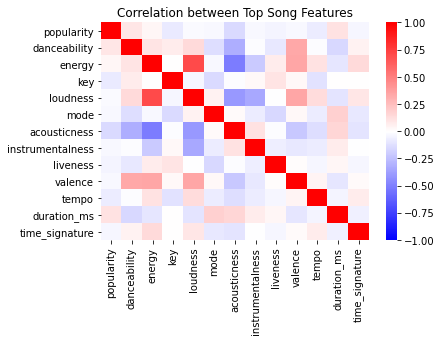

In [39]:
# Plot 1: Heat Map/ Correlation Matrix Top Songs 
corr_TOP = topSongs.corr()
_ = sns.heatmap(corr_TOP, vmin = -1, vmax = 1, cmap = 'bwr').set(title="Correlation between Top Song Features") 

The plot below shows the correlation between TikTok Song Features.

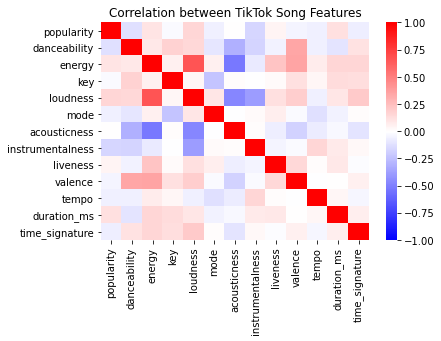

In [40]:
# Plot 2: Heat Map/ Correlation Matrix TikTok Songs 
corr_TIKTOK = tiktok_data.drop("popularity_scaled",axis=1).corr()
_ = sns.heatmap(corr_TIKTOK, vmin = -1, vmax = 1, cmap = 'bwr').set(title="Correlation between TikTok Song Features") 

Acousticness and energy are one of the most negatively correlated variables, for both Top Songs and TikTok Songs. Acousticness and loudness have a similar correlation. The correlation is slightly stronger in  TikTok Songs for both cases.

In [41]:
#correlation coefficient of acousticness and energy in Top Songs
corr_TOP["acousticness"]["energy"]

-0.5099557676470683

In [42]:
#correlation coefficient of acousticness and energy in TikTok Songs
corr_TIKTOK["acousticness"]["energy"]

-0.5250764940316159

In [43]:
#correlation coefficient of acousticness and loudness in Top Songs
corr_TOP["acousticness"]["loudness"]

-0.4004640316481959

In [45]:
#correlation coefficient of acousticness and loudness in TikTok Songs
corr_TIKTOK["acousticness"]["loudness"]

-0.46896436477389

For Top Songs, the correlation coefficient of acousticness and energy is -0.51. For TikTok Songs, the correlation coefficient of acousticness and energy is -0.525. 

For Top Songs, the correlation coefficient of acousticness and loudness is -0.40. For TikTok Songs, the correlation coefficient of acousticness and loudness is -0.47. 

Next, we compared the distribution of variables that are on a [0,1] scale and incorporate grammar of graphics by scaling, facetting, aesthetic mappings and using color. Acousticness, danceability, energy, liveness, and valence are all variables originally with a [0,1] scale. Since popularity was originally [0,100] it would still be interpretable on a [0,1] scale, so we scaled it as such. The aesthetic elements include the value of each variable mapped to the x axis and the density of the variables on the y axis. We used a pastel color scheme to clearly differentiate the variables. We used facetting for the ease of comparison. The density (y axis) is also scaled so the distributions are comparable. We make sure to follow the principles of data integrity when properly reformatting the data so the visualizations can be accurately compared.

In [57]:
#subsetting variables that are interpretable when scaled to 0 to 1
quant01 = ['danceability', 'energy', 
    'acousticness', 'liveness',
       'valence',"popularity_scaled"]
colors = ['#ffb3ba', '#ffdfba', '#ffffba', '#baffc9','#bae1ff',"#D5D6EA"]

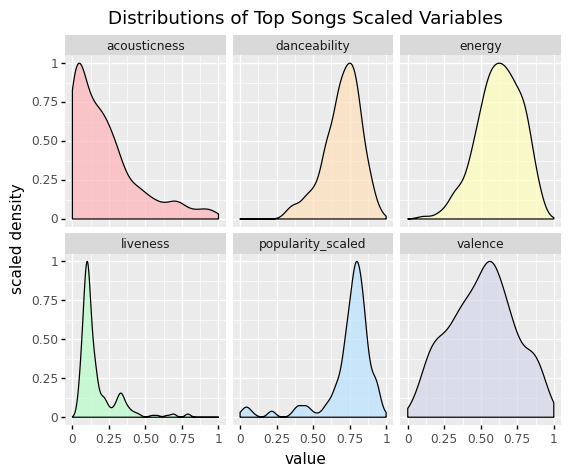

In [62]:
# Plot 3: Distributions of Scaled Variables Top Songs

#Scaling popularity 
topSongs["popularity_scaled"] = topSongs["popularity"]/100

facetdf_TOP = pd.melt(topSongs, id_vars=['id'], value_vars=quant01)

gg = p9.ggplot(facetdf_TOP, p9.aes(x='value', y = after_stat("scaled"), fill = 'factor(variable)'))
gg += p9.geom_density(alpha = 0.7, show_legend=False)
gg += p9.facet_wrap('~variable') 
gg += p9.scale_fill_manual(values = colors)
gg += p9.ggtitle("Distributions of Top Songs Scaled Variables")
gg += p9.labels.ylab("scaled density")
gg.draw();

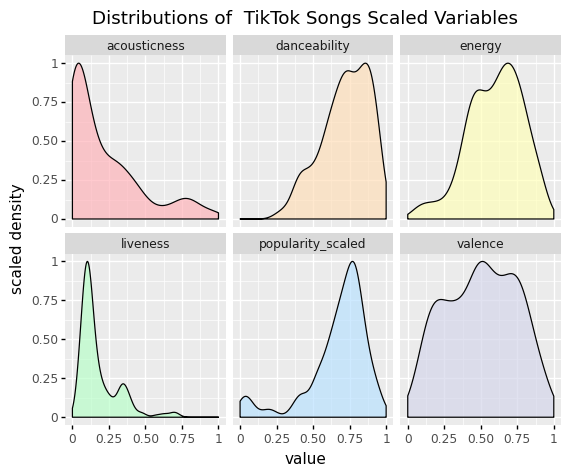

In [63]:
# Plot 4: Distributions of Scaled Variables Top Songs

#Scaling popularity 
tiktok_data["popularity_scaled"] = tiktok_data["popularity"]/100

facetdf_TikTok = pd.melt(tiktok_data, id_vars=['id'], value_vars=quant01)

gg = p9.ggplot(facetdf_TikTok, p9.aes(x='value', y = after_stat("scaled"), fill = 'factor(variable)'))
gg += p9.geom_density(alpha = 0.7, show_legend=False)
gg += p9.facet_wrap('~variable') 
gg += p9.scale_fill_manual(values = colors)
gg += p9.ggtitle("Distributions of  TikTok Songs Scaled Variables")
gg += p9.labels.ylab("scaled density")
gg.draw();

Below shows the scaled variables distributions for Top Songs and TikTok Songs side by side for ease of comparison.

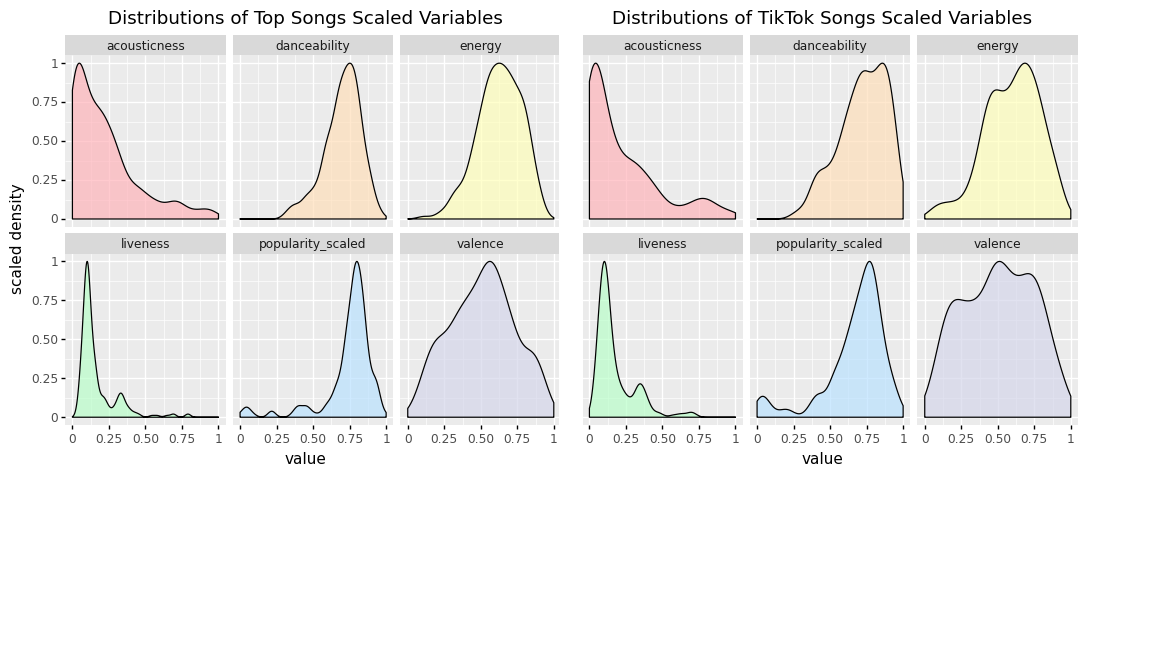

From comparing the above graphs, we can observe:

1. Both Top Songs and TikTok Songs tend to have low acousticness. 
2. TikTok Songs tend to have a higher danceability than Top Songs. 
3. Both Top Songs and TikTok Songs tend to have low liveness, so the songs are typically not live recordings with an audience.
4. The distribution of energy in Both Top Songs and TikTok Songs appear be left-skewed, so they tend to have higher energy.
5. The distribution of popularity of TikTok Songs appears to be left-skewed. This could be explained by there being songs that are popular on the TikTok platform, but not in the general public. 
6. TikTok songs have more variety in valence, meaning the mood of TikTok songs are more variable.

Another relationship we examined was that of danceability and release date of songs. We incorporated grammar of graphics by utilizing aesthetic mappings and color of time signature for both TikTok songs and Top Songs. In these plots, we are using the geometric element of geom_count to put down points on the graph. There are coordinate systems with gridlines and ggplot layering, as well as labels, title, and colorbar legend for hue of the plots. The aesthetic mappings are x to the release_date variable, and y to the danceability variable. The color aesthetic mapping component is determined by the time_signature variable which represents the number of beats (3,4, or 5) in each bar of a song. We make sure to follow the principles of data integrity when properly reformatting the data so the visualizations can be accurately compared.

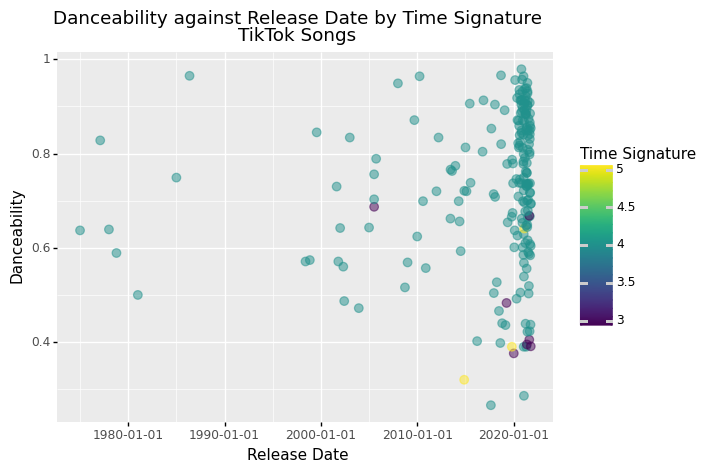

In [11]:
# Plot 5: Danceability against Release date by color Time Signature TikTok Songs
#replace tiktok_data df with topSongs df to get the second plot in the side-by-side below         
plot4 = p9.ggplot(tiktok_data, p9.aes(x='release_date', y = "danceability", color = "time_signature") )
plot4 += p9.geom_count(alpha = 0.5, size = 3)
plot4 += p9.ggtitle('Danceability against Release Date by Time Signature\nTikTok Songs')
plot4 += p9.labels.ylab("Danceability")
plot4 += p9.labels.xlab("Release Date")
plot4 += p9.labs(color='Time Signature') 
plot4.draw();                  

Below shows Danceability against Release Date by Time Signature for TikTok Songs and Top Songs side by side for ease of comparison.

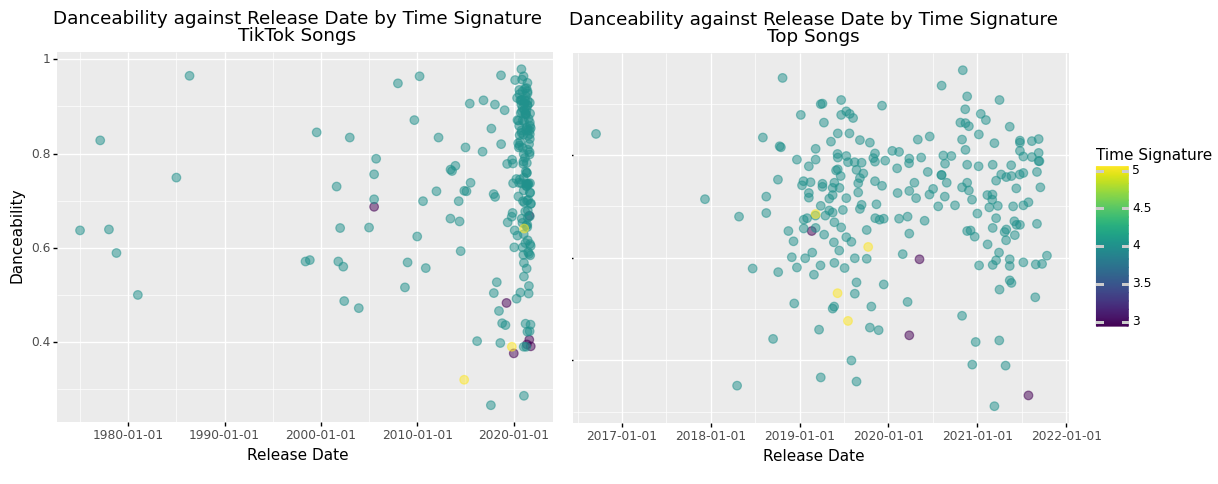

We can see that there is a big difference in the scatter of the points for the plots above. For Top Songs, the points are far more spread out, while for TikTok songs most of the points are in a vertical straight line around the year 2020. This can be best explained by the time range of the release date, which reveals that while most of the songs used on Tiktok have been released within a year of 2020, many of the songs used have release dates that fall into the range from the 1970's to 2020's as well. All Top Songs have been released at the earliest in 2016, so the time range difference between these two types of playlists is dramatic and is visible through the scatter. The relationship between danceability for TikTok songs vs release date indicates that songs with older release dates are generally in the more danceable range of [0.5,1.0] while newer released songs may not be as danceable. It may be that these older released songs are brought back into popularity on TikTok due to their unique danceability in comparison with newer released songs which are used perhaps for their novelty and less for dancing purposes. Top Songs appear to be more danceable than TikTok songs because most of their cluster is between [0.6,0.9], and this makes sense because Top Songs are generally more targeted towards the general audience for their catchiness which contributes to danceability while in TikTok not every audio snippet is used for dancing. We chose to color the plots by Time Signature so we could observe how the 5 beats/bar and 3 beats/bar fit in the relationship between danceability and release date. Most songs had 4 beats per bar, but we found that 3 and 5 beats of time signature were generally less danceable for both Tiktok and Top Songs.

Since TikTok clips are in short-clip format, the song audio snippet which is used in a TikTok must stand out in some way for users and content creators to find it popular. We will investigate how the duration (minutes) of a song in top songs may differ from the duration of TikTok songs and note any trends between duration and popularity of songs for both data sources.

We perform data munging by first rearranging the rows of both `topSongs` and `tiktok_data` dataframes in order of popularity, from highest value to lowest value, then resetting the index.

In [12]:
#sort topSongs by popularity and reset the index, display head
topSongs_sorted = topSongs.sort_values('popularity', ascending = False)
topSongs_sorted = topSongs_sorted.reset_index()
topSongs_sorted.head()

index                      id                      title  \
0    145  0gplL1WMoJ6iYaPgMCL0gX                 Easy On Me   
1    152  5HCyWlXZPP0y6Gqq8TgA20  STAY (with Justin Bieber)   
2    219  6Uj1ctrBOjOas8xZXGqKk4                      Woman   
3    231  6zSpb8dQRaw0M1dK8PBwQz    Cold Heart - PNAU Remix   
4    236  2Xr1dTzJee307rmrkt8c0g   love nwantiti (ah ah ah)   

                          all_artists  popularity release_date  danceability  \
0                           ['Adele']         100   2021-10-14         0.604   
1  ['The Kid LAROI', 'Justin Bieber']          97   2021-07-09         0.591   
2                        ['Doja Cat']          95   2021-06-25         0.824   
3  ['Elton John', 'Dua Lipa', 'PNAU']          95   2021-08-13         0.796   
4                            ['CKay']          94   2019-08-30         0.727   

   energy  key  loudness  mode  acousticness  instrumentalness  liveness  \
0   0.366    5    -7.519     1        0.5780          0.000000    0.1330   
1   0.764    1    -5.484     1        0.0383          0.000000    0.1030   
2   0.764    5    -4.175     0        0.0888          0.002940    0.1170   
3   0.798    1    -6.312     1        0.0340          0.000042    0.0952   
4   0.739    8    -3.805     1        0.3650          0.001370    0.1610   

   valence    tempo  duration_ms  time_signature  
0    0.130  141.981       224695               4  
1    0.478  169.928       141806               4  
2    0.881  107.998       172627               4  
3    0.942  116.032       202735               4  
4    0.533   93.005       145800               4

In [13]:
#sort tiktok songs by popularity and reset the index, display head
tiktok_sorted = tiktok_data.sort_values('popularity', ascending = False)
tiktok_sorted = tiktok_sorted.reset_index()
tiktok_sorted.head()

index                      id                              title  \
0      4  0gplL1WMoJ6iYaPgMCL0gX                         Easy On Me   
1     52  5HCyWlXZPP0y6Gqq8TgA20          STAY (with Justin Bieber)   
2     58  27NovPIUIRrOZoCHxABJwK  INDUSTRY BABY (feat. Jack Harlow)   
3     74  3Wrjm47oTz2sjIgck11l5e                            Beggin'   
4     29  0e8nrvls4Qqv5Rfa2UhqmO                  THATS WHAT I WANT   

                          all_artists  popularity release_date  danceability  \
0                           ['Adele']         100   2021-10-14         0.604   
1  ['The Kid LAROI', 'Justin Bieber']          97   2021-07-09         0.591   
2        ['Lil Nas X', 'Jack Harlow']          96   2021-07-23         0.736   
3                        ['Måneskin']          94   2017-12-08         0.714   
4                       ['Lil Nas X']          94   2021-09-17         0.737   

   energy  key  loudness  mode  acousticness  instrumentalness  liveness  \
0   0.366    5    -7.519     1       0.57800               0.0    0.1330   
1   0.764    1    -5.484     1       0.03830               0.0    0.1030   
2   0.704    3    -7.409     0       0.02030               0.0    0.0501   
3   0.800   11    -4.808     0       0.12700               0.0    0.3590   
4   0.846    1    -4.510     0       0.00614               0.0    0.0486   

   valence    tempo  duration_ms  time_signature  popularity_scaled  
0    0.130  141.981       224695               4               1.00  
1    0.478  169.928       141806               4               0.97  
2    0.894  149.995       212000               4               0.96  
3    0.589  134.002       211560               4               0.94  
4    0.546   87.981       143901               4               0.94

We can see from the head of each of the sorted playlists that the first two most popular songs for TikTok and for Top Songs in the last three years are "Easy On Me" by Adele and "STAY" by The Kid LAROI and Justin Bieber. We can connect some popularity of a song in the last three years to TikTok popular songs because TikTok became relevant within the 3 year time range and these songs were released within that range as well.

Now we will extract the duration of each song in minutes rather than milliseconds for each dataset. We will conduct this data munging because comparing song distributions in minutes makes more sense.

In [15]:
def ms_to_min_converter(time_ms):
    '''
    The function takes in the duration of a song in milliseconds and converts it to minutes,
    returns the duration of the song in minutes.
    '''
    ms_to_secs = time_ms/1000
    secs_to_mins = ms_to_secs/60
    
    return secs_to_mins

In [16]:
topSongs_sorted['duration_mins'] = topSongs_sorted['duration_ms'].map(ms_to_min_converter)
tiktok_sorted['duration_mins'] = tiktok_sorted['duration_ms'].map(ms_to_min_converter)

We incorporated grammar of graphics by utilizing aesthetic mappings, scale and color for both TikTok songs and Top Songs. In these plots, we are using the geometric element of geom_histogram to put down bars of frequency on the graph, with bins of width 30. There are coordinate systems with gridlines and ggplot layering, as well as labels, title, and hue of the plots. The aesthetic mappings are x to the duration_mins variable, and y to the counts of the songs. The color component is muted blue for Top Songs and muted orange for TikTok songs. We make sure to follow the principles of data integrity when properly reformatting the data so the visualizations can be accurately compared.

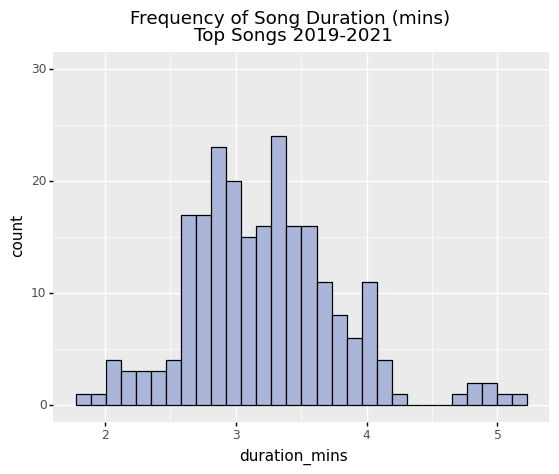

In [36]:
(
    p9.ggplot(topSongs_sorted, aes(x='duration_mins'))
    + geom_histogram(color = "black", fill = "#A9B5D9", bins = 30)+
    p9.ggtitle('Frequency of Song Duration (mins) \nTop Songs 2019-2021') +p9.scales.ylim(0,30)

).draw();

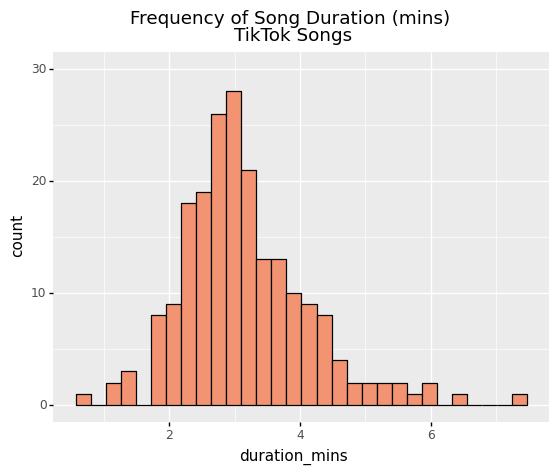

In [35]:
(
   p9.ggplot(tiktok_sorted, aes(x='duration_mins'))
    + geom_histogram(color = "black", fill = "#F29472", bins = 30) +
    p9.ggtitle('Frequency of Song Duration (mins) \nTikTok Songs')+ p9.scales.ylim(0,30)

    
).draw();

Below shows the frequency of song duration (minutes) for Top Songs and TikTok Songs side by side for ease of comparison.

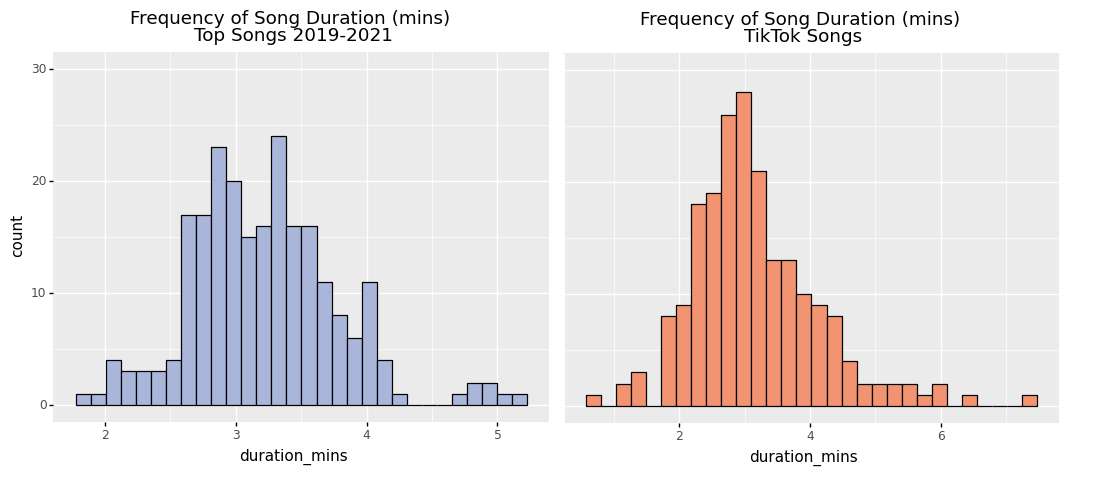

From the histograms above it appears that the duration of Top Songs from 2019-2021 are within the range of nearly 3 to 3.5 minutes, while the duration for Tiktok Songs is smaller, with greatest frequencies around 3 minutes or less. This implies that despite some great outliers for TikTok of more than 6 minutes duration, or for top songs of greater than 4 minutes duration, generally popular Tiktok songs have a smaller duration in minutes. It is possible that TikTok songs may be used more often and thus become popular due to their shorter length while on Spotify users may be more likely to listen to a longer song and make it popular since there is no visual component as there is with TikTok songs.

Our next trend we intend to explore is the artists which come up as having the most number of popular tracks for both TikTok and Top Songs of the last three years. 
We will start by making sure there are no duplicates in either of the playlists, i.e. no songs that have repeated entries with different popularity values. We will do this by checking if the title of each entry of the dataframe is unique, which means it is not repeated.

In [19]:
#if the number of unique titles in tiktok data is equal to the number of titles then return True, else False
len(tiktok_sorted['title'].unique()) == len(tiktok_sorted['title'])

True

So for the `tiktok_sorted` dataframe every title is unique. Now let us see if this is the same for `topSongs`.

In [21]:
#if the number of unique titles in topSongs data is equal to the number of titles then print True, else False
print(len(topSongs_sorted['title'].unique()) == len(topSongs_sorted['title']))
topSongs_sorted.groupby(['title']).size()[topSongs_sorted.groupby(['title']).size().sort_values(ascending = False)>1]

False


title
Dance Monkey              2
Don't Start Now           2
Dynamite                  2
Heat Waves                2
Mood (feat. iann dior)    2
Need to Know              2
Shivers                   2
dtype: int64

We can see that there are six songs listed above which are repeated one more time than we need. We will now remove the duplicates, and since the dataframe is sorted by popularity we will select the entry with the higher popularity score, which comes first (lower index value).

In [23]:
topSongs_sorted = topSongs_sorted.drop_duplicates(subset="title", keep='first', inplace=False)

We write a function `getArtists()` to extract the artist names from both dataframes so that we can construct wordclouds for the artists who have the most popular songs.

In [30]:
def getArtists(df):
    '''
    Function getArtists takes in dataframe of tiktok songs sorted or Top Songs sorted
    and returns a list of all the artists in the playlist from column all_artists
    '''
    all_song_artists = []
    for i in range(len(df.all_artists.values)):
        m = re.compile(r"\w{1,20}.\w{1,20}.\w{1,20}.\w{1,20}.\w{1,20}.\w{1,20}", re.MULTILINE | re.DOTALL)
        f = m.findall(df.all_artists.values[i])
        if len(f) > 0:
            for j in range(len(f)):
                all_song_artists.append(f[j])        
    return all_song_artists

Below is the wordcloud for Top Songs 2019-2021, which has the names of top 100 artists on the list represented in larger font size if they have more popular tracks and smaller font if they have less.

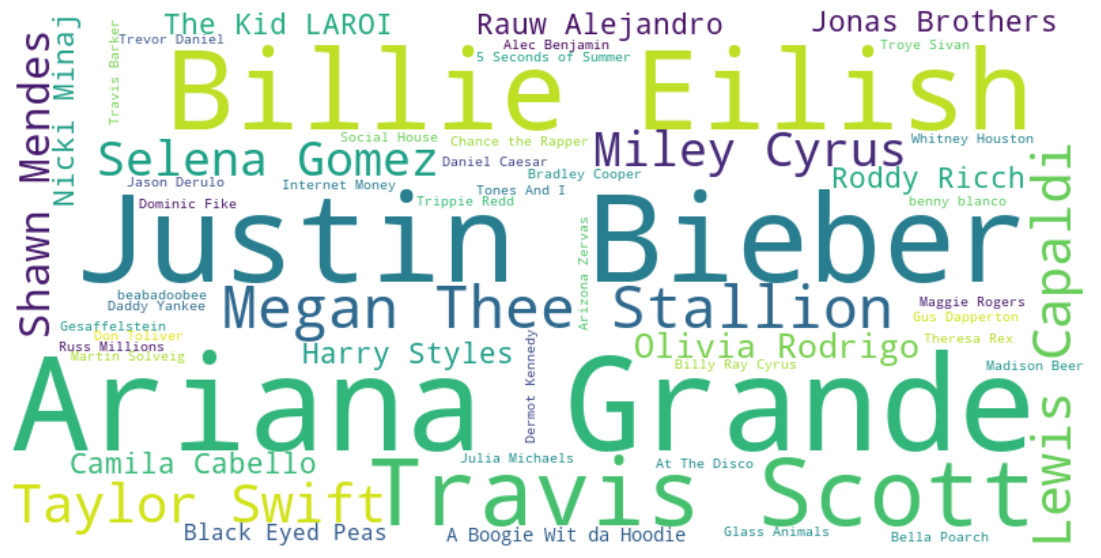

In [31]:
wc = WordCloud(background_color='white',width=800, height=400, max_words = 100).generate_from_frequencies(Counter(list(getArtists(topSongs_sorted))))
plt.figure(figsize=(20, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Our second wordloud below is for TikTok songs, which has the names of top 100 artists on the list represented in larger font size if they have more popular tracks and smaller font if they have less.

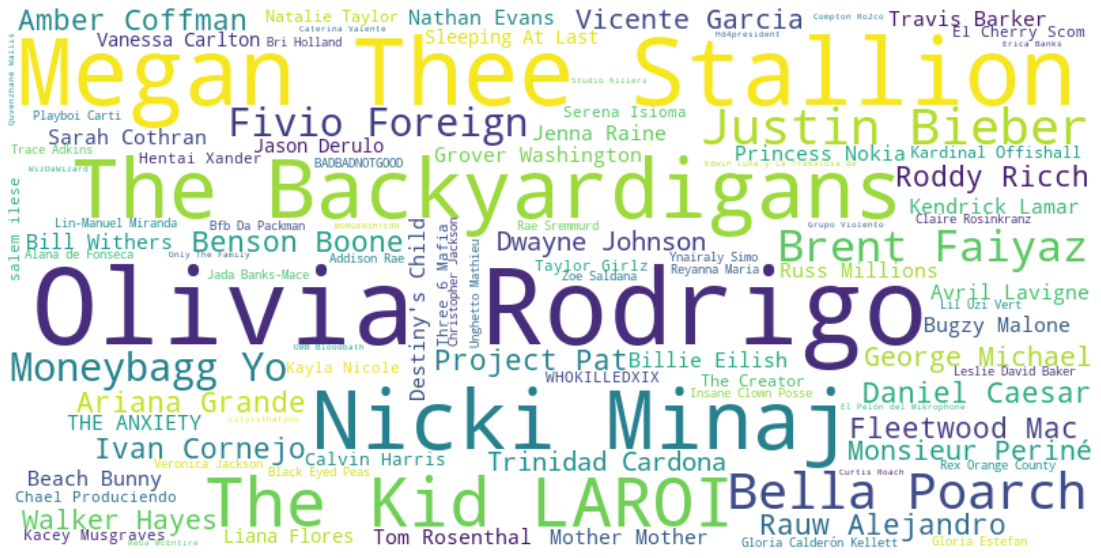

In [32]:
wc2 = WordCloud(background_color='white',width=800, height=400,max_words=100 
#                ,mask =tiktok_mask 
               ).generate_from_frequencies(Counter(list(getArtists(tiktok_sorted))))
plt.figure(figsize=(20, 10))
plt.imshow(wc2, interpolation='bilinear')
plt.axis('off')
plt.show()

From the two wordclouds above, we can see that artists The Kid LAROI, Megan Thee Stallion, Justin Bieber, Nicki Minaj, Rauw Alejandro, Olivia Rodrigo, Roddy Rich and Ariana Grande are creating a lot of popular songs that are both on Spotify's Top Songs 2019-2021 and TikTok songs. The artists are famous and well known for their songs especially in the last three years. However, the number of artists in TikTok songs that have small font size (second wordcloud) is much larger than the number of artists in Top Songs (first wordcloud). One reason this might be is because there are many novelty songs or songs with special auditory or cultural references that are used only in TikTok for the effect they make and may not be mainstream otherwise in Top Songs. Another reason is that some older songs from before 2019-2021 have been revived in TikTok but are not represented as top songs of 2019-2021.

# Conclusion

After this introduction to the data that Spotify offers, one of our takeaways is that Spotify does not give enough of its data to the public. A metric that we would have been useful that Spotify did not give us access to is song popularity over time, since the popularity metric Spotify offers is only available for the current day. Spotify also does not disclose the specifics of how their algorithms calculate their metrics, or give access to the variables used to calculate these metrics. As a result, we can only work with data transformed by Spotify, rather than raw song data.

Some unexpected difficulties we ran into with Spotify were that playlists were paginated, even though the playlists did not appear on multiple pages in the Spotify app. We used properties of the data that Spotify returned to get around this issue.

We acknowledge that there may be bias in this data analysis, since, as TikTok lacks an official API, the data from TikTok is retrieved from Spotify instead of directly from TikTok. Also, our playlist for Top Songs in 2021 is from a Spotify user, not Spotify itself, since Spotify's 2021 playlist is not yet available. This reduces the accuracy of our Top Songs being actual Top Songs according to Spotify. 

An interesting conclusion we found was that TikTok has many songs that are not very popular; possible meaning that TikTok brings awareness to artists that aren't popular in the general public and potentially more business opportunities for less known artists. Compared to TikTok songs, mainstream Top Songs were largely populated with well-known artists. A similar observation we made was that artists that are popular in the mainstream, are not necessarily as popular on TikTok. 

It was also interesting to note that most of the popular songs on TikTok were shorter in duration (minutes) compared to Top Songs. Tiktok has also brought back some old songs! It has made them popular (and more danceable) again.

One limitation of our study is that artists may not be popular on Spotify but may still be considered popular in the public. This results in a disconnect between Spotify's popularity metric and user opinion, and likely affects the results of popularity based analysis. Additionally, we have only extracted data from Spotify, but there are other used platforms for accessing music, such as the radio, Apple Music, YouTube, and more, that we haven't considered. However, as Spotify is the leading platform and is regarded as the most popular, we believe that it should contain a substantial amount of the information needed for this analysis.

In the future, we could utilize machine learning algorithms such as clustering to find more relationships between features and types of playlists. It would also be useful also to create models that predict song popularity, whether in general or on TikTok, given song feature; a tool music creators and providers would likely find use in. Another intriguing idea is to do analysis on the lyrics of popular songs and see which key words or themes make a song popular.

